# ANALYZING AND PREDICTING FACEBOOK ENGAGEMENT

The facebook posts insights data is given to predict the facebook post perfomance

## Structure of the project

    1)Data Preparation
    2)Exploratory Data Analysis
    3)Prediction Models
       1. Linear regression
       2. Random forest regression
       3. Ridge regression
    4) Topic Modelling
    5) Topics classification

## Data Preparation

###### Importing packages

In [ ]:
import pandas as pd
import numpy as np
import json 
import os 
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\puja9\Desktop\Ascent")


In [148]:
data = pd.read_json(r"posts.json",lines = True)
data.head()

,caption,created_time,description,feed_targeting,id,insights,link,link_to_post,message,name,picture,story
0,komonews.com,2015-09-17 20:50:00,About 20 western Virginia high school students...,NaN,114431401958534_940695755998757,{'post_impressions': {'name': 'post_impression...,http://www.komonews.com/news/national/Students...,http://facebook.com/114431401958534_9406957559...,Do you think the Confederate flag should be ba...,Students suspended for clothing displaying Con...,https://external.xx.fbcdn.net/safe_image.php?d...,NaN
1,NaN,2015-09-17 20:20:01,NaN,NaN,114431401958534_940684872666512,{'post_impressions_fan_paid': {'name': 'post_i...,https://www.facebook.com/KOMONews/photos/a.121...,http://facebook.com/114431401958534_9406848726...,Seattle Seahawks' Russell Wilson answered lots...,Timeline Photos,https://fbcdn-photos-b-a.akamaihd.net/hphotos-...,NaN
2,komonews.com,2015-09-17 19:49:28,Despite September looking like it will break o...,NaN,114431401958534_940684229333243,{'post_impressions': {'name': 'post_impression...,http://www.komonews.com/weather/blogs/scott/Ne...,http://facebook.com/114431401958534_9406842293...,"It'll be a bummer for snow lovers, but warm-we...","New forecasts still say mild winter, hot summe...",https://external.xx.fbcdn.net/safe_image.php?d...,NaN
3,komonews.com,2015-09-17 19:18:00,Amazon is dangling a $50 tablet computer in it...,NaN,114431401958534_940637569337909,{'post_impressions': {'name': 'post_impression...,http://www.komonews.com/news/tech/Amazon-dangl...,http://facebook.com/114431401958534_9406375693...,What do you think of Amazon's cheaper tablet?,Amazon dangles $50 tablet computer to hook mor...,https://fbexternal-a.akamaihd.net/safe_image.p...,NaN
4,komonews.com,2015-09-17 18:45:00,Earth's record-breaking heat is sounding an aw...,NaN,114431401958534_940535546014778,{'post_impressions': {'name': 'post_impression...,http://www.komonews.com/news/national/Earths-r...,http://facebook.com/114431401958534_9405355460...,Meteorologists say 2015 is a near certainty to...,Earth's record streak of record heat keeps on ...,https://external.xx.fbcdn.net/safe_image.php?d...,NaN


In [149]:
komo = ['komonews.com','www.komonews.com','abcnews.go.com','youtube.com','www.youtube.com','rumble.com','sbg.komonews.com','cnn.com','www.cnn.com']

In [150]:
data.picture[1]

'https://fbcdn-photos-b-a.akamaihd.net/hphotos-ak-xpf1/v/t1.0-0/s130x130/12004093_940684872666512_5624798814013094912_n.jpg?oh=5b6d7e5f8b47b6a2adc2862de66212e2&oe=5699F9C2&__gda__=1453745791_ebccf121de2e3e33f6bd907454e7c7d3'

In [151]:
data_komo = data[data.caption.isin(komo)]
data_komo = data_komo.reset_index()
data_komo = data_komo.replace(np.nan, '', regex=True)

In [152]:
len(data_komo)

5266

###### Getting the tags from the link

In [243]:
def get_tag(x):
    if 'komonews' in x:
        x = re.sub('http://www.komonews.com/[A-Za-z0-9]+/','',x)
        x = x.split('/')
        return x[0] 

In [153]:
data_komo['Descript'] = data_komo['description']+data_komo['message']+data_komo['name']

In [15]:
for i in data_komo['insights']:
    if len(i)!=58 :
        print(length(i))
tag = []
vaa = []
for i in data_komo['insights'][0].keys():
    tag.append(i)
    vaa.append(data_komo['insights'][0][i]['description'])
    
description = pd.DataFrame()
description['tag'] = tag
description['desc'] = vaa
description.head()
description.to_csv(r"insights_description.csv")

In [47]:
newdata_ = pd.DataFrame()
new_list =[]
for j in range(len(data_komo['insights'])):
   
    x ={}
    for i in data_komo['insights'][j].keys():
        value = data_komo['insights'][j][i]['values'][0]['value']
        x[i] = value
        x['id'] = data_komo['id'][j]
    new_list.append(x)  

In [185]:
newdata_ = pd.DataFrame(new_list,columns = x.keys())
newdata_.head()
newdata_['post_consumptions_by_type'][3]

{'link clicks': 120, 'other clicks': 241, 'photo view': 1}

In [49]:

dict_list = ['post_stories_by_action_type','post_storytellers_by_action_type','post_video_retention_graph_autoplayed','post_impressions_by_story_type','post_impressions_by_story_type_unique','post_story_adds_by_action_type_unique','post_negative_feedback_by_type_unique','post_negative_feedback_by_type','post_consumptions_by_type_unique','post_story_adds_by_action_type_unique','post_story_adds_by_action_type','post_video_retention_graph','post_impressions_by_paid_non_paid_unique','post_impressions_by_paid_non_paid','post_video_retention_graph_clicked_to_play','post_consumptions_by_type']
len(dict_list)

16

In [50]:
num_list = [i for i in newdata_.columns if i not in dict_list]
num_list.append('id')
print(len(num_list))
ignore_list = ['post_video_retention_graph_clicked_to_play','post_video_retention_graph','post_video_retention_graph_autoplayed','post_video_avg_time_watched','post_video_views_paid_unique', 'post_video_views_paid','post_video_length','post_video_complete_views_paid','post_video_complete_views_30s_paid',  'post_video_avg_time_watched']
num_list = [ i for i in num_list if i not in ignore_list]
print(len(num_list))
data_num = newdata_[num_list]
data_num.head()

45
39


,post_engaged_users,post_impressions_fan_unique,post_impressions,post_video_complete_views_30s_unique,post_impressions_fan,post_video_complete_views_30s,post_storytellers,post_story_adds_unique,post_video_complete_views_organic_unique,post_impressions_fan_paid,...,post_video_complete_views_30s_autoplayed,post_video_complete_views_organic,post_impressions_viral_unique,post_impressions_paid,post_story_adds,post_stories,post_video_views_unique,post_video_views_clicked_to_play,post_video_views_autoplayed,id
0,117,3566,4072,0,4037,0,38,38,0,0,...,0,0,22,0,42,42,0,0,0,114431401958534_940695755998757
1,2001,37757,65538,0,57439,0,628,628,0,0,...,0,0,6400,0,731,731,0,0,0,114431401958534_940684229333243
2,212,6036,9226,0,8967,0,24,24,0,0,...,0,0,86,0,28,28,0,0,0,114431401958534_940637569337909
3,314,19474,32136,0,31637,0,88,88,0,0,...,0,0,236,0,100,100,0,0,0,114431401958534_940535546014778
4,660,20716,33750,0,32914,0,73,73,0,0,...,0,0,423,0,80,80,0,0,0,114431401958534_940531679348498


In [51]:
 ignore_list = ['post_video_retention_graph_clicked_to_play','post_video_retention_graph','post_video_retention_graph_autoplayed','post_video_avg_time_watched','post_video_views_paid_unique', 'post_video_views_paid','post_video_length','post_video_complete_views_paid','post_video_complete_views_30s_paid',  'post_video_avg_time_watched']

In [52]:
for i in dict_list:
    print(i,newdata_[i][9])

post_stories_by_action_type {'share': 9, 'like': 120, 'comment': 528}
post_storytellers_by_action_type {'share': 9, 'like': 122, 'comment': 254}
post_video_retention_graph_autoplayed {}
post_impressions_by_story_type {'other': 8537}
post_impressions_by_story_type_unique {'other': 6258}
post_story_adds_by_action_type_unique {'share': 9, 'like': 122, 'comment': 254}
post_negative_feedback_by_type_unique {'hide_all_clicks': 1, 'hide_clicks': 40}
post_negative_feedback_by_type {'hide_all_clicks': 1, 'hide_clicks': 44}
post_consumptions_by_type_unique {'link clicks': 939, 'other clicks': 3159}
post_story_adds_by_action_type_unique {'share': 9, 'like': 122, 'comment': 254}
post_story_adds_by_action_type {'share': 9, 'like': 120, 'comment': 528}
post_video_retention_graph {}
post_impressions_by_paid_non_paid_unique {'total': 62591, 'paid': 0, 'unpaid': 62591}
post_impressions_by_paid_non_paid {'total': 110655, 'paid': 0, 'unpaid': 110655}
post_video_retention_graph_clicked_to_play {}
post_con

In [53]:
dict_list.append('id')
len(dict_list)
total_clicks =[]
total_impressions =[]
total_impressions_unique =[]
total_shares =[]
total_comments = []
total_likes =[]
negative_feedback =[]
id = []
for j in range(len(newdata_)):
    for i in dict_list:
        if i == 'post_stories_by_action_type':
            if 'like' in newdata_[i][j].keys():
                total_likes.append(newdata_[i][j]['like'])
            else:
                total_likes.append(0)
            if 'comment' in newdata_[i][j].keys():
                total_comments.append(newdata_[i][j]['comment'])
            else:
                total_comments.append(0)
            if 'share' in newdata_[i][j].keys():
                total_shares.append(newdata_[i][j]['share'])
            else:
                total_shares.append(0)
        if i == 'post_impressions_by_story_type':
            if 'other' in newdata_[i][j].keys():
                total_impressions.append(newdata_[i][j]['other'])
            else:
                 total_impressions.append(0)
        if i == 'post_impressions_by_story_type_unique':
            if 'other' in newdata_[i][j].keys():
                total_impressions_unique.append(newdata_[i][j]['other'])
            else:
                 total_impressions_unique.append(0)
        if i == 'post_consumptions_by_type':
            total_clicks.append(sum(newdata_[i][j].values()))
        if i =='post_negative_feedback_by_type':
            negative_feedback.append(sum(newdata_[i][j].values()))
        if i == 'id':
            id.append(newdata_[i][j])
    
    
    
    


In [54]:
len(id)

5266

In [55]:
data_dict = pd.DataFrame()
data_dict['id']= id
data_dict['total_clicks'] = total_clicks
data_dict['total_impressions'] = total_impressions
data_dict['total_impressions_unique'] = total_impressions_unique
data_dict['total_shares'] = total_shares
data_dict['total_comments'] = total_comments
data_dict['total_likes'] = total_likes
data_dict['negative_feedback'] = negative_feedback

In [56]:
data_dict.head()

,id,total_clicks,total_impressions,total_impressions_unique,total_shares,total_comments,total_likes,negative_feedback
0,114431401958534_940695755998757,170,30,22,1,35,6,2
1,114431401958534_940684229333243,2169,8491,6400,161,165,405,8
2,114431401958534_940637569337909,238,118,86,4,2,22,2
3,114431401958534_940535546014778,362,308,227,4,35,61,8
4,114431401958534_940531679348498,717,558,412,20,12,50,14


In [57]:
data_dict.index = data_dict['id']
data_num.index = data_num['id']

In [97]:
len(data_insights)

5268

In [98]:
data_insights.head()

,id,total_clicks,total_impressions,total_impressions_unique,total_shares,total_comments,total_likes,negative_feedback,post_impressions_viral,post_video_complete_views_organic_unique,...,post_video_complete_views_paid_unique,post_impressions,post_video_views,post_consumptions,post_consumptions_unique,post_impressions_organic,post_video_views_autoplayed,post_impressions_organic_unique,post_video_views_organic_unique,post_video_complete_views_30s
0,114431401958534_940695755998757,170,30,22,1,35,6,2,30,0,...,0,4072,0,170,107,4042,0,3572,0,0
1,114431401958534_940684229333243,2169,8491,6400,161,165,405,8,8491,0,...,0,65538,0,2169,1688,57047,0,37558,0,0
2,114431401958534_940637569337909,238,118,86,4,2,22,2,118,0,...,0,9226,0,238,197,9108,0,6154,0,0
3,114431401958534_940535546014778,362,308,227,4,35,61,8,308,0,...,0,32136,0,362,255,31828,0,19702,0,0
4,114431401958534_940531679348498,717,558,412,20,12,50,14,558,0,...,0,33750,0,717,605,33192,0,21023,0,0


In [99]:
data_komo.drop(['feed_targeting', 'insights','story',], axis=1, inplace=True)

In [100]:
data_komo.columns

Index(['index', 'caption', 'created_time', 'description', 'id', 'link',
       'link_to_post', 'message', 'name', 'picture', 'Descript'],
      dtype='object')

In [101]:
data_komo.index = data_komo['id']

In [102]:
data_final = pd.merge(data_komo, data_insights, on='id', how='inner')

In [103]:
data_final.head()

,index,caption,created_time,description,id,link,link_to_post,message,name,picture,...,post_video_complete_views_paid_unique,post_impressions,post_video_views,post_consumptions,post_consumptions_unique,post_impressions_organic,post_video_views_autoplayed,post_impressions_organic_unique,post_video_views_organic_unique,post_video_complete_views_30s
0,0,komonews.com,2015-09-17 20:50:00,About 20 western Virginia high school students...,114431401958534_940695755998757,http://www.komonews.com/news/national/Students...,http://facebook.com/114431401958534_9406957559...,Do you think the Confederate flag should be ba...,Students suspended for clothing displaying Con...,https://external.xx.fbcdn.net/safe_image.php?d...,...,0,4072,0,170,107,4042,0,3572,0,0
1,2,komonews.com,2015-09-17 19:49:28,Despite September looking like it will break o...,114431401958534_940684229333243,http://www.komonews.com/weather/blogs/scott/Ne...,http://facebook.com/114431401958534_9406842293...,"It'll be a bummer for snow lovers, but warm-we...","New forecasts still say mild winter, hot summe...",https://external.xx.fbcdn.net/safe_image.php?d...,...,0,65538,0,2169,1688,57047,0,37558,0,0
2,3,komonews.com,2015-09-17 19:18:00,Amazon is dangling a $50 tablet computer in it...,114431401958534_940637569337909,http://www.komonews.com/news/tech/Amazon-dangl...,http://facebook.com/114431401958534_9406375693...,What do you think of Amazon's cheaper tablet?,Amazon dangles $50 tablet computer to hook mor...,https://fbexternal-a.akamaihd.net/safe_image.p...,...,0,9226,0,238,197,9108,0,6154,0,0
3,4,komonews.com,2015-09-17 18:45:00,Earth's record-breaking heat is sounding an aw...,114431401958534_940535546014778,http://www.komonews.com/news/national/Earths-r...,http://facebook.com/114431401958534_9405355460...,Meteorologists say 2015 is a near certainty to...,Earth's record streak of record heat keeps on ...,https://external.xx.fbcdn.net/safe_image.php?d...,...,0,32136,0,362,255,31828,0,19702,0,0
4,6,komonews.com,2015-09-17 17:58:09,Authorities say two more bodies have been foun...,114431401958534_940531679348498,http://www.komonews.com/news/national/Death-to...,http://facebook.com/114431401958534_9405316793...,The tragedy comes as firefighters gained groun...,Death toll rises to 5 in Calif. wildfires as m...,https://external.xx.fbcdn.net/safe_image.php?d...,...,0,33750,0,717,605,33192,0,21023,0,0


In [104]:
len(data_final)

5272

In [106]:
data_final = data_final.drop_duplicates()

In [107]:
len(data_final)

5266

## Prediction
###### Now our data is ready. Lets define our problem statement. 
Develop a model to predict a post performance for new posts. 
Assumptions: The number of likes indicates the post performance.
Predicting the likes determines the post performance



In [4]:
data_final = pd.read_csv(r"data_final.csv")
import warnings
warnings.filterwarnings("ignore")

In [7]:
data_final['category'] = data_final['link'].apply(lambda x : get_tag(x))


    post_consumptions == Number of clicks.&nbsp;
    post_consumptions_unique == No.of people clicked &nbsp;
    post_engaged_fan == No.of people liked page and clicked &nbsp;
    post_engaged_user == No.of people clicked &nbsp;
    post_fan_reach == No.of people who liked page and saw the post &nbsp;
    post_impressions == Total number of impressions &nbsp; 
    post_total_impressions_unique/total_impressions_unique == No.of people who saw the post through friends&nbsp;
    post_impressions_fan == No.of impressions through fan&nbsp;
    post_impressions_organic == No.of impressions through pages timeline&nbsp;
    post_impressions_organic_unique == No.of people who saw posts through pages timeline &nbsp;
    post_impressions_viral == No.of impressions generated by friend's story&nbsp;
    post_impressions_viral_unique == No of people who saw the page story at friends&nbsp;
    post_story_adds == No of stories generated about your page post&nbsp;
    post_story_tellers == No.of.people who created stories from the post &nbsp;
    post_negative_feedback == 
    post_negative_feedback_type ==&nbsp;

    Because columns are recorded after posting, they will not be used for modeling. However, they can give useful information about post reach, and we will be looking at them in EDA.&nbsp;

    post_impressions_paid_unique : Lifetime: The number of people your advertised Page post was served to. (Unique Users)&nbsp;
    We can use this if they paid for promotion of the post
    post_fan_reach : Lifetime: The number of people who saw your Page post because they've liked your Page (Unique Users)
    Assuming that post_fan_reach is correlated to number of people who have liked the page

In [ ]:
df = data_final[['created_time','post_impressions_paid_unique','total_likes','post_video_views','caption']]

In [10]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['month'] = df['created_time'].apply(lambda x: x.strftime('%m')) 

In [11]:
df['weekday'] = df['created_time'].dt.weekday_name

In [12]:
df['hour'] = df['created_time'].dt.hour

In [13]:
df.head()

,post_impressions_paid_unique,created_time,total_likes,post_video_views,post_fan_reach,caption,category,paid,month,weekday,hour
0,0,2015-09-17 20:50:00,6,0,3566,komonews.com,national,0,09,Thursday,20
1,0,2015-09-17 19:49:28,405,0,37757,komonews.com,blogs,0,09,Thursday,19
2,0,2015-09-17 19:18:00,22,0,6036,komonews.com,tech,0,09,Thursday,19
3,0,2015-09-17 18:45:00,61,0,19474,komonews.com,national,0,09,Thursday,18
4,0,2015-09-17 17:58:09,50,0,20716,komonews.com,national,0,09,Thursday,17


In [14]:
def caption_cat(x):
    komo = ['komonews.com','www.komonews.com','sbg.komonews.com']
    cnn  = ['cnn.com','www.cnn.com']
    youtube = ['youtube.com','www.youtube.com']
    other = ['abcnews.go.com','rumble.com']
    if x in komo:
        return 1
    if x  in cnn:
        return 2
    if x in youtube:
        return 3
    if x in other:
        return 0

In [15]:
df['caption'] = df['caption'].apply(lambda x : caption_cat(x))

In [16]:
def category_group(x):
    if x == 'local':
        return 1
    else:
        return 0

In [17]:
df['category'] = df['category'].apply(lambda x : category_group(x))

###### Exploratory data analysis (EDA)

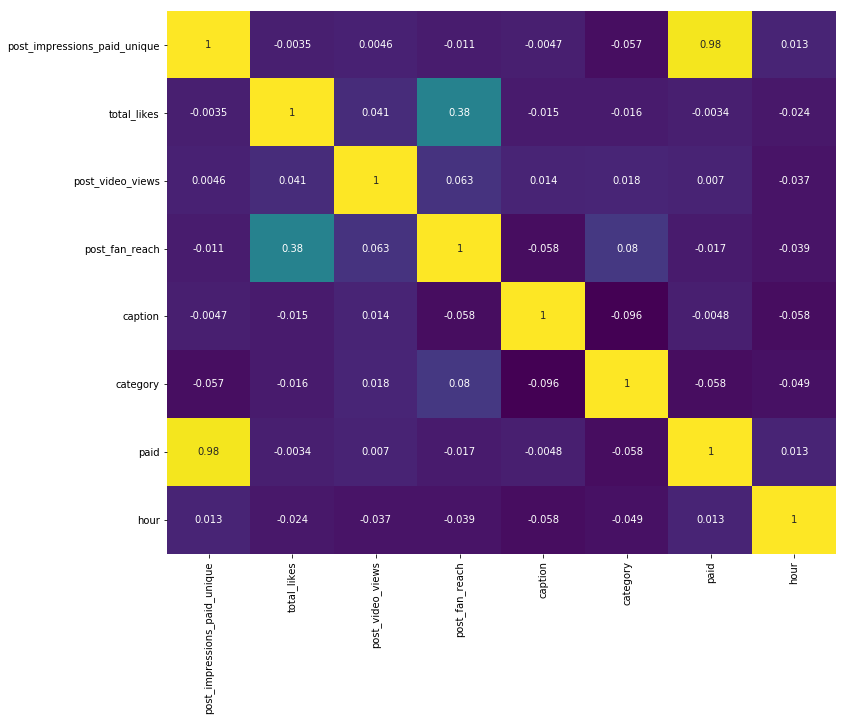

In [19]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)

###### Univariate analysis on page likes and post likes 

Text(0.5,1,'Distribution of Total Page Likes')

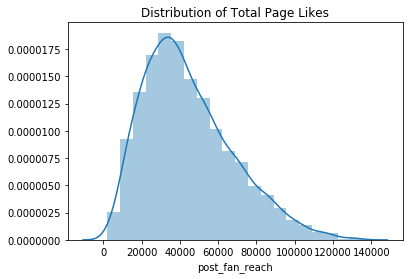

In [20]:
sns.distplot(df['post_fan_reach'],bins=20)
plt.title("Distribution of Total Page Likes")

Text(0.5,1,'Distribution of Like/Post')

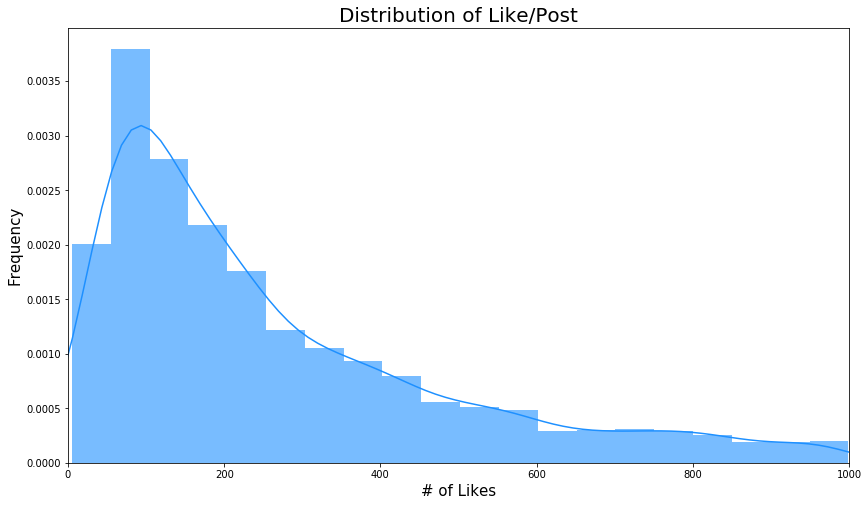

In [21]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['total_likes']<1000]['total_likes'],bins=20,color='dodgerblue',hist_kws={'alpha':0.6})
plt.xlim(0,1000)
plt.xlabel("# of Likes",fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Like/Post',fontsize=20)

###### Analysis of time categories

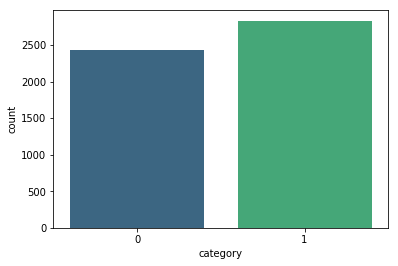

In [22]:
sns.countplot(df['category'],palette='viridis')

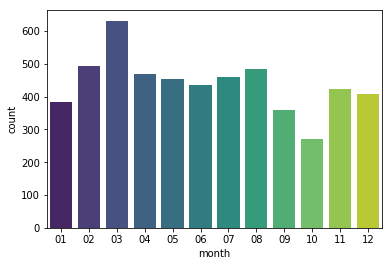

In [23]:
sns.countplot(df['month'],palette='viridis')

Text(0.5,1,'Frequency of Posts by Weekday')

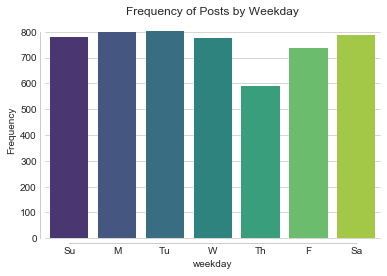

In [24]:
from collections import OrderedDict
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['weekday'],palette='viridis')
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Weekday")
#plt.savefig('dayCount.png', bbox_inches='tight')

Text(0.5,1,'Frequency of Posts by Hour')

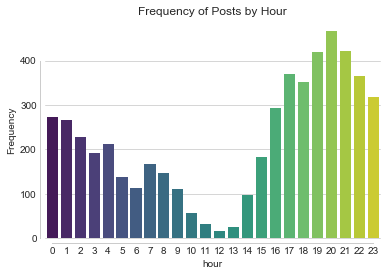

In [25]:
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['hour'],palette='viridis',)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Hour")
#plt.savefig('hourCount.png', bbox_inches='tight')

Text(0,0.5,'# of Likes')

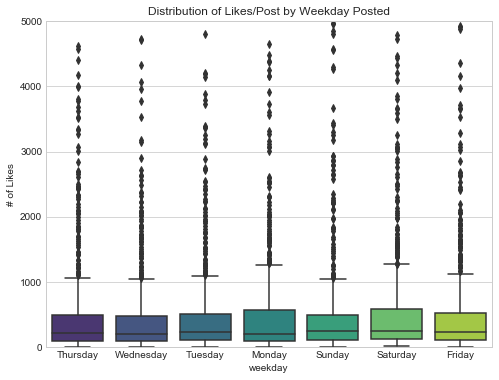

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday',y='total_likes',data=df,palette='viridis')
plt.ylim(0,5000)
plt.title("Distribution of Likes/Post by Weekday Posted")
plt.ylabel("# of Likes")

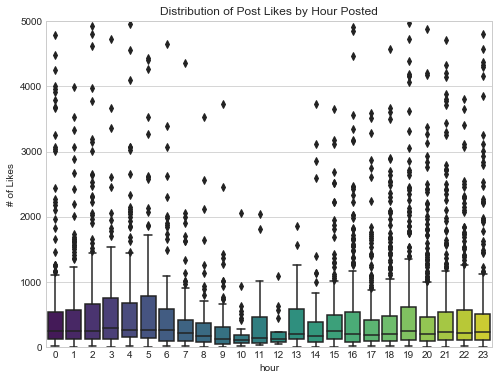

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hour',y='total_likes',data=df,palette='viridis')
plt.ylim(0,5000)
plt.title("Distribution of Post Likes by Hour Posted")
plt.ylabel("# of Likes")
plt.savefig('hourBox.png', bbox_inches='tight')

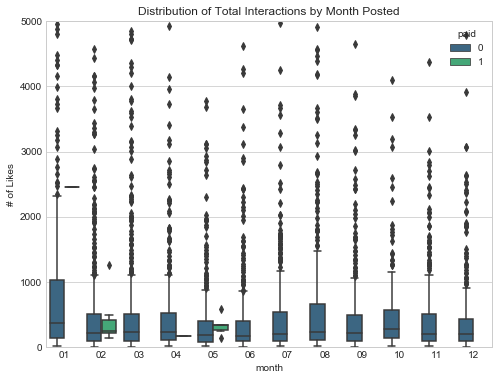

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='month',y='total_likes',data=df, hue ='paid',palette='viridis')
plt.ylim(0,5000)
plt.title("Distribution of Total Interactions by Month Posted")
plt.ylabel("# of Likes")
plt.savefig('monthBox.png', bbox_inches='tight')

###### Total Page Likes vs. Post likes

Text(0.5,1,'# Page Likes vs. # Post Likes')

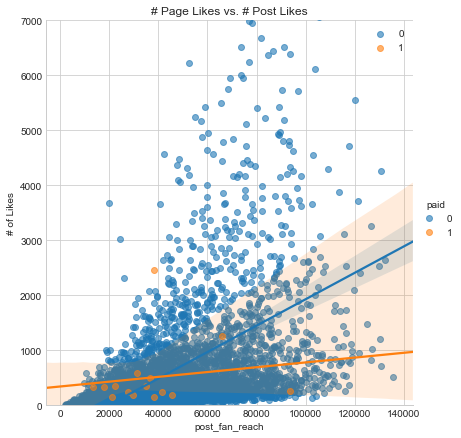

In [29]:
sns.lmplot(x='post_fan_reach',y='total_likes',hue = 'paid',
           data=df,fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.legend()
plt.ylim(0,7000)
plt.ylabel("# of Likes")
plt.title('# Page Likes vs. # Post Likes')

Does the number of likes per post increase as the total page like increases? It depends.

###### Category vs likes

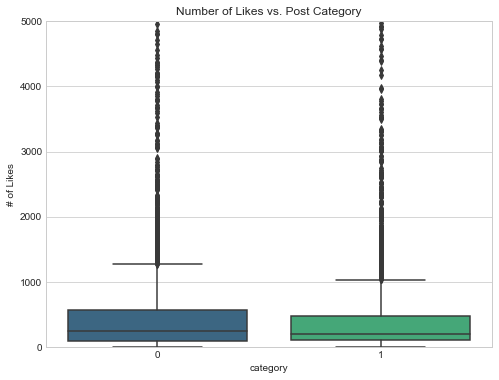

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category',y='total_likes',data=df,palette='viridis')
plt.ylim(0,5000)
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")
plt.savefig('catBox.png', bbox_inches='tight')

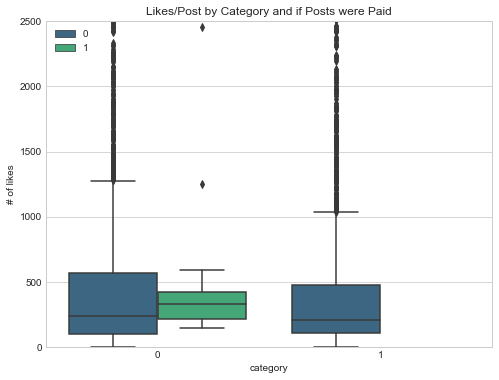

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category',y='total_likes',data=df,hue='paid',palette='viridis')
plt.ylim(0,2500)
plt.ylabel("# of likes")
plt.legend(loc='upper left')
plt.title("Likes/Post by Category and if Posts were Paid")
plt.savefig('catPaidCount.png', bbox_inches='tight')

###### Paid Posts vs. Likes

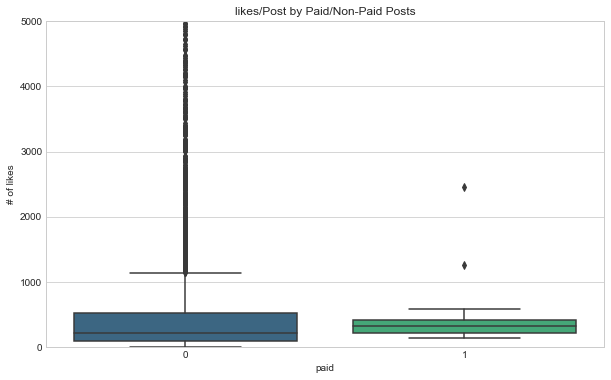

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='paid',y='total_likes',data=df,palette='viridis')
plt.ylim(0,5000)
#sns.despine(offset=4,bottom=True)
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of likes")
plt.savefig('paidBox.png', bbox_inches='tight')

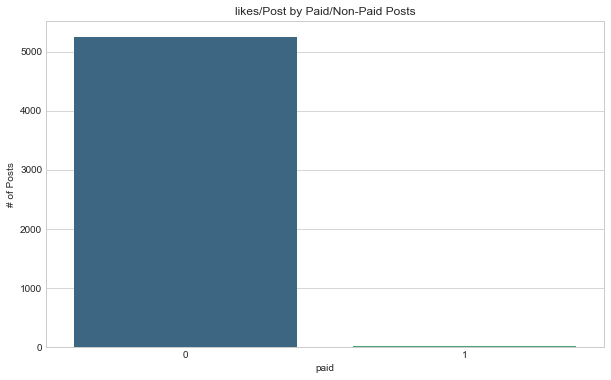

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='paid',data=df,palette='viridis')
#sns.despine(offset=4,bottom=True)
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of Posts")
plt.savefig('paidCount.png', bbox_inches='tight')

Observations:

There were more non-paid posts than paid posts

## Prediction

###### Modeling: Can we predict the number of likes a post will get?

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

###### Removing Outliers and Binarizing Categorical Variables
To remove the decent amount of outliers, I will remove nay variables that are above the 90th percentile.

After, I will span the categorical columns out into binary features. To avoid multicolinearity, I will be taking n-1 columns for each feature.

Removing Outliers

In [35]:
outlierCut = np.percentile(df['total_likes'],90)
outlierCut

1255.0

In [36]:
df = df[df['total_likes']<outlierCut]

In [40]:
df.weekday.value_counts()

Wednesday    731
Tuesday      727
Thursday     706
Friday       706
Monday       695
Saturday     643
Sunday       531
Name: weekday, dtype: int64

In [41]:
df.head()

,post_impressions_paid_unique,created_time,total_likes,post_video_views,post_fan_reach,caption,category,paid,month,weekday,hour
0,0,2015-09-17 20:50:00,6,0,3566,1,0,0,09,Thursday,20
1,0,2015-09-17 19:49:28,405,0,37757,1,0,0,09,Thursday,19
2,0,2015-09-17 19:18:00,22,0,6036,1,0,0,09,Thursday,19
3,0,2015-09-17 18:45:00,61,0,19474,1,0,0,09,Thursday,18
4,0,2015-09-17 17:58:09,50,0,20716,1,0,0,09,Thursday,17


In [43]:
hourDf = pd.get_dummies(df['hour'],prefix='hr_')
df = pd.concat([df,hourDf],axis=1)
monthDf = pd.get_dummies(df['month'],prefix='Mo')
df = pd.concat([df,monthDf],axis=1)

In [44]:
df.head()

,post_impressions_paid_unique,created_time,total_likes,post_video_views,post_fan_reach,caption,category,paid,month,weekday,...,Mo_03,Mo_04,Mo_05,Mo_06,Mo_07,Mo_08,Mo_09,Mo_10,Mo_11,Mo_12
0,0,2015-09-17 20:50:00,6,0,3566,1,0,0,09,Thursday,...,0,0,0,0,0,0,1,0,0,0
1,0,2015-09-17 19:49:28,405,0,37757,1,0,0,09,Thursday,...,0,0,0,0,0,0,1,0,0,0
2,0,2015-09-17 19:18:00,22,0,6036,1,0,0,09,Thursday,...,0,0,0,0,0,0,1,0,0,0
3,0,2015-09-17 18:45:00,61,0,19474,1,0,0,09,Thursday,...,0,0,0,0,0,0,1,0,0,0
4,0,2015-09-17 17:58:09,50,0,20716,1,0,0,09,Thursday,...,0,0,0,0,0,0,1,0,0,0


In [45]:
captionDf = pd.get_dummies(df['caption'],prefix='cap_')

In [47]:
df = pd.concat([df,captionDf],axis = 1)

In [49]:
df['cat_1'] = pd.get_dummies(df['category'])[1]
df['cat_0'] = pd.get_dummies(df['category'])[0]

In [51]:
df.columns


Index(['post_impressions_paid_unique', 'created_time', 'total_likes',
       'post_video_views', 'post_fan_reach', 'caption', 'category', 'paid',
       'month', 'weekday', 'hour', 'hr__0', 'hr__1', 'hr__2', 'hr__3', 'hr__4',
       'hr__5', 'hr__6', 'hr__7', 'hr__8', 'hr__9', 'hr__10', 'hr__11',
       'hr__12', 'hr__13', 'hr__14', 'hr__15', 'hr__16', 'hr__17', 'hr__18',
       'hr__19', 'hr__20', 'hr__21', 'hr__22', 'hr__23', 'Mo_01', 'Mo_02',
       'Mo_03', 'Mo_04', 'Mo_05', 'Mo_06', 'Mo_07', 'Mo_08', 'Mo_09', 'Mo_10',
       'Mo_11', 'Mo_12', 'cap__0', 'cap__1', 'cap__2', 'cap__3', 'cat_1',
       'cat_0'],
      dtype='object')

In [282]:
x = df[['hr__0', 'hr__1', 'hr__2', 'hr__3', 'hr__4',
       'hr__5', 'hr__6', 'hr__7', 'hr__8', 'hr__9', 'hr__10', 'hr__11',
       'hr__12', 'hr__13', 'hr__14', 'hr__15', 'hr__16', 'hr__17', 'hr__18',
       'hr__19', 'hr__20', 'hr__21', 'hr__22', 'hr__23', 'Mo_01', 'Mo_02',
       'Mo_03', 'Mo_04', 'Mo_05', 'Mo_06', 'Mo_07', 'Mo_08', 'Mo_09', 'Mo_10',
       'Mo_11', 'Mo_12', 'cap__0', 'cap__1', 'cap__2', 'cap__3', 'cat_1',
       'cat_0','post_video_views','post_fan_reach']]

y = df['total_likes']
x.head()

,hr__0,hr__1,hr__2,hr__3,hr__4,hr__5,hr__6,hr__7,hr__8,hr__9,...,Mo_11,Mo_12,cap__0,cap__1,cap__2,cap__3,cat_1,cat_0,post_video_views,post_fan_reach
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3566
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,37757
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,6036
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,19474
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,20716


In [287]:
s = x['post_fan_reach']
z = (s-s.mean())/s.std()
x['post_fan_reach'] = z

In [288]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.1,
                                                  random_state=42)

In [289]:
len(y_test)

474

In [290]:
x_train.head()

,hr__0,hr__1,hr__2,hr__3,hr__4,hr__5,hr__6,hr__7,hr__8,hr__9,...,Mo_11,Mo_12,cap__0,cap__1,cap__2,cap__3,cat_1,cat_0,post_video_views,post_fan_reach
4233,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0.175673
3143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,-1.091907
2965,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0.016206
163,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.957203
4110,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,-0.835275


    It's important to standardize the variables. Since the values of post_fan_reach in ten thousands.variables measured at different scales do not contribute equally to the analysis. For example, in boundary detection, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. 
    Using these variables without standardization in effect gives the variable with the larger range a weight of 100 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability. 

###### Linear regression 

In [291]:



reg = linear_model.LinearRegression(normalize=True)
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [292]:
reg.coef_

array([ 1.58756804e+14,  1.58756804e+14,  1.58756804e+14,  1.58756804e+14,
        1.58756804e+14,  1.58756804e+14,  1.58756804e+14,  1.58756804e+14,
        1.58756804e+14,  1.58756804e+14,  1.58756804e+14,  1.58756804e+14,
        1.58756804e+14,  1.58756804e+14,  1.58756804e+14,  1.58756804e+14,
        1.58756804e+14,  1.58756804e+14,  1.58756804e+14,  1.58756804e+14,
        1.58756804e+14,  1.58756804e+14,  1.58756804e+14,  1.58756804e+14,
       -8.01667737e+14, -8.01667737e+14, -8.01667737e+14, -8.01667737e+14,
       -8.01667737e+14, -8.01667737e+14, -8.01667737e+14, -8.01667737e+14,
       -8.01667737e+14, -8.01667737e+14, -8.01667737e+14, -8.01667737e+14,
       -1.33901842e+16, -1.33901842e+16, -1.33901842e+16, -1.33901842e+16,
       -1.44195293e+16, -1.44195293e+16, -8.10472043e-01,  1.21172683e+02])

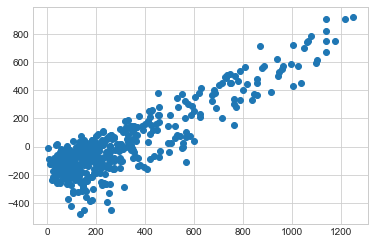

In [294]:
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)

LRerror = y_test - pred
plt.scatter(y_test, LRerror)


In [295]:
testScore = r2_score(y_pred=pred,y_true=y_test)
trainScore = r2_score(y_pred=pred_train,y_true=y_train)

In [296]:
lrResults = pd.DataFrame()
lrResults['Score'] = [trainScore,testScore]
lrResults['Step'] = ['train','test']

lrResults

,Score,Step
0,0.225035,train
1,0.187188,test


linear regression has performed poorly. Let's try another modelling method

###### Random Forest 

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.4,
                                                  random_state=42)


In [297]:

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(x_train, y_train)
#rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [298]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

In [299]:
print(spearman[0])
print(pearson[0])

0.42762080788342527
0.34976956874963283


In [300]:
train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)
print(spearmanTrain[0])
print(pearsonTrain[0])

0.9444131371399468
0.9645774581229174


In [301]:
RFperf = pd.DataFrame()
RFperf['Score'] = [round(train_score,3),round(test_score,3)]
RFperf['Step'] = ['train','test']
RFperf

,Score,Step
0,0.882,train
1,0.075,test


###### Ridge Regression

In [134]:
from sklearn.linear_model import Ridge

In [302]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(x_train, y_train)

#predict on train set
y_pred_train=cv.predict(x_train)

# Predict test set
y_pred_test=cv.predict(x_test)

# rmse on train set
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
ridge_error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(ridge_error))

Root Mean Squared Error: 233.02159438364498
Root Mean Squared Error: 242.27601705151463


###### Neural Networks

In [311]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [332]:
input_dim = len(x.columns)
print(input_dim)
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

44


In [333]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
estimator.fit(x_train,y_train)

In [334]:

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)



In [335]:
results.mean()

-55447.40873391464

In [336]:
results.std()

4126.169616845166

In [337]:
prediction = estimator.predict(x_test)

In [338]:
nn_score = r2_score(y_test,prediction)

In [339]:
nn_score

0.1944996838231926

# What are publishers talking about

## Topic Modelling

In [249]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import nltk
from html.parser import HTMLParser
import string

In [250]:
stopword_list = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()
html_parser = HTMLParser()

In [251]:
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    
    
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

In [252]:
def normalize_corpus(corpus,tokenize=True):
    
    normalized_corpus = []  
    for text in corpus:
        text = html_parser.unescape(text)
        #text = expand_contractions(text, CONTRACTION_MAP)
        text = text.lower()
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
            
    return normalized_corpus

In [253]:
corpus = [i for i in data_komo['Descript']]

In [254]:
stopword_list = nltk.corpus.stopwords.words('english')

In [255]:
# LSI topic model
norm_tokenized_corpus = normalize_corpus(corpus, tokenize=True)
#norm_tokenized_corpus


In [256]:
dictionary = corpora.Dictionary(norm_tokenized_corpus)

In [257]:
corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus]

In [265]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [259]:
total_topics = 20

lsi = models.LsiModel(corpus_tfidf, 
                      id2word=dictionary, 
                      num_topics=total_topics)

In [266]:
for index, topic in lsi.print_topics(total_topics):
    print ('Topic #'+str(index+1))
    print(topic)


Topic #1
0.212*"police" + 0.186*"man" + 0.173*"seattle" + 0.143*"year" + 0.137*"old" + 0.131*"car" + 0.127*"school" + 0.120*"woman" + 0.103*"fire" + 0.102*"say"
Topic #2
0.240*"adoptable" + 0.221*"humane" + 0.219*"cats" + 0.208*"10" + 0.205*"society" + -0.185*"police" + 0.180*"seahawks" + 0.169*"seattle" + 0.151*"photos" + -0.145*"man"
Topic #3
-0.256*"seahawks" + 0.231*"adoptable" + 0.208*"humane" + 0.206*"cats" + 0.192*"society" + 0.174*"10" + 0.142*"police" + 0.141*"old" + 0.138*"homeward" + 0.138*"furry"
Topic #4
-0.594*"school" + 0.245*"seahawks" + -0.225*"high" + -0.146*"students" + -0.139*"marysville" + -0.139*"state" + 0.138*"car" + -0.130*"teachers" + 0.129*"bowl" + -0.127*"student"
Topic #5
-0.342*"seahawks" + -0.282*"school" + 0.261*"fire" + 0.190*"state" + -0.170*"bowl" + 0.167*"washington" + -0.162*"super" + -0.150*"police" + -0.124*"wilson" + -0.116*"man"
Topic #6
0.252*"crash" + 0.227*"fire" + 0.223*"school" + 0.185*"car" + 0.167*"driver" + 0.166*"humane" + 0.153*"societ

In [271]:
 lda = models.LdaModel(corpus_tfidf, 
                          id2word=dictionary,
                          iterations=1000,
                          num_topics=total_topics)

In [273]:
for index, topic in lda.print_topics(total_topics):
    print ('Topic #'+str(index+1))
    print(topic)

Topic #1
0.004*"driver" + 0.004*"crash" + 0.003*"car" + 0.003*"people" + 0.003*"kirkland" + 0.003*"auction" + 0.002*"shoreline" + 0.002*"struck" + 0.002*"crashes" + 0.002*"gas"
Topic #2
0.003*"bus" + 0.002*"patrick" + 0.002*"sunset" + 0.002*"burien" + 0.002*"594" + 0.002*"theatre" + 0.002*"effective" + 0.002*"sunrise" + 0.002*"gardens" + 0.002*"whale"
Topic #3
0.004*"2014" + 0.004*"halloween" + 0.003*"costumes" + 0.003*"semi" + 0.002*"landslides" + 0.002*"demonstrators" + 0.002*"food" + 0.002*"stabbing" + 0.002*"celebration" + 0.002*"turkey"
Topic #4
0.007*"seahawks" + 0.003*"photos" + 0.003*"carroll" + 0.003*"game" + 0.003*"»" + 0.003*"«" + 0.003*"coach" + 0.002*"seattle" + 0.002*"share" + 0.002*"team"
Topic #5
0.003*"starbucks" + 0.003*"powell" + 0.003*"mph" + 0.002*"cafe" + 0.002*"chicago" + 0.002*"warmest" + 0.002*"secret" + 0.002*"ring" + 0.002*"fall" + 0.002*"boston"
Topic #6
0.004*"airport" + 0.003*"neighbor" + 0.003*"flu" + 0.003*"holiday" + 0.003*"seattle" + 0.002*"dog" + 0.00

    The LDA Model is essentially a classifier, which classifies the posts to different classes. Then, it gives about ten words as the name of each class. These ten words would be the topics of the posts in this class.

    Some parameters require tuning in this model. One of the most important parameter is the number of topics. We tuned this parameter to 20 topics based on the final result since the posts with the same topic have similar content.
    The LDA model would classify each post to one of the topics.

    Auto generated topics from the topic modeling might not be representative. 
    The topic model is forced to classify the posts as the number of topics we specified, rather than to classify the posts based on their similarity. 


## Text Clustering

In [234]:
def prelimClean(s):
        try:
            return " ".join(re.findall(r'\w+', s,flags = re.UNICODE | re.LOCALE)).lower()
        except:
            return " ".join(re.findall(r'\w+', "no_text",flags = re.UNICODE | re.LOCALE)).lower()

In [235]:
# some more cleaning
p = re.compile('[.,/:+()<>|!-@#$%^;&_=?*]|(\\\)')

eng_stop = stopwords.words("english")

In [236]:
def removeStopwords(x):   
    tmp = [w for w in x if w.lower() not in eng_stop]
    return tmp

def stemIt(word_list, stemmer= PorterStemmer(), encoding= "utf8"):
    tmp = []
    for w in word_list:
        tmp.append(stemmer.stem(w).encode(encoding))
    return tmp


def cleanText(x):
    x = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',x)
    x = re.sub('[\s]+', ' ', x) #remove unnecessary spaces
    x = p.sub(" ", x)
    return x


def wrapItUp(x, stemming= True):
    if stemming:
        x = b" ".join(stemIt(removeStopwords(word_tokenize(cleanText(x)))))
    else:
        x = b" ".join(removeStopwords(word_tokenize(cleanText(x))))
    return x.decode('utf-8')


In [237]:
data_komo["cleaned_notes"] = [wrapItUp(t, stemming= True) for t in data_komo['Descript']]

In [238]:
vectorizer=TfidfVectorizer(min_df=0.005, decode_error='ignore',norm='l2')#,max_features = 100)
vectorizer.fit(data_komo["cleaned_notes"])
vectorized = vectorizer.transform(data_komo["cleaned_notes"])
print("Completed TFIDF matrix")

Completed TFIDF matrix


In [16]:
def top_tfidf_feats(row, features, top_n=5):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [features[i] for i in topn_ids]
    return top_feats
    
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=5):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids]#.toarray()
    else:
        D = Xtr#.toarray()
    tfidf_means = np.asarray(D.mean(axis=0))[0]
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=5):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = []
    Count = []

    LabelDict = dict(Counter(y))
    sort = sorted(LabelDict.items(), key=operator.itemgetter(0))
    for label,count in sort:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        Count.append(count)
        labels.append(label)
        dfs.append(' '.join(feats_df))
        
    df = pd.DataFrame({'ClusterVolume':Count, 'Words':dfs},index= labels)
    return df


In [17]:
vectorizer=TfidfVectorizer(min_df=0.005, decode_error='ignore',norm='l2')#,max_features = 100)
vectorizer.fit(data_komo["cleaned_notes"])
vectorized = vectorizer.transform(data_komo["cleaned_notes"])
print("Completed TFIDF matrix")

Completed TFIDF matrix


In [18]:
features = vectorizer.get_feature_names()

In [21]:
features[0:5]


['abl', 'abus', 'accid', 'accord', 'account']

######    when using K-Means clustering, we need to determine whether we are using the right number of clusters. 
    One method to evaluate the number of clusters is the elbow method.

In [22]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(vectorized).score(vectorized) for i in range(len(km))]

In [26]:
distortions = []
K = range(5,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++',n_init=10,random_state=130)
    kmeanModel.fit(vectorized)
    distortions.append(kmeanModel.inertia_)


Text(0.5,1,'Elbow curve')

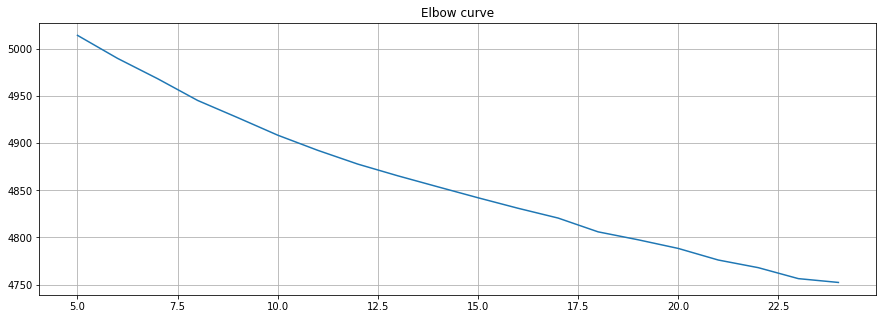

In [27]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(5, 25), distortions)
plt.grid(True)
plt.title('Elbow curve')

    We are unable to find optimal number of clusters. This might be due to low volume of the data.

## Future work

    We can gather more data by parsing the link posts to identify the topics.
    After identifying the topics, we can analyze which topics are performing well. 